In [18]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
from scipy.stats import ttest_rel

In [19]:
data = {}
with open('2500x2500 TIFF Photos.csv','r',encoding='utf-8') as f:
    f.readline()
    while line := f.readline():
        line = line.split(',')
        try:
            #3C-1.tif - Series 1
            #[3C-1,tif - Series 1]
            data[line[1].strip().split('-')[0]].append(float(line[2]))
        except:
            data[line[1].strip().split('-')[0]] = [float(line[2])]

In [20]:
print(data.keys())

dict_keys(['3C', '3OE', '4C', '4OE', '5C', '5OE', '6C', '6OE', '7C', '7OE', '8C', '8OE', '9C', '9OE', '10C', '10OE', '12C', '12OE'])


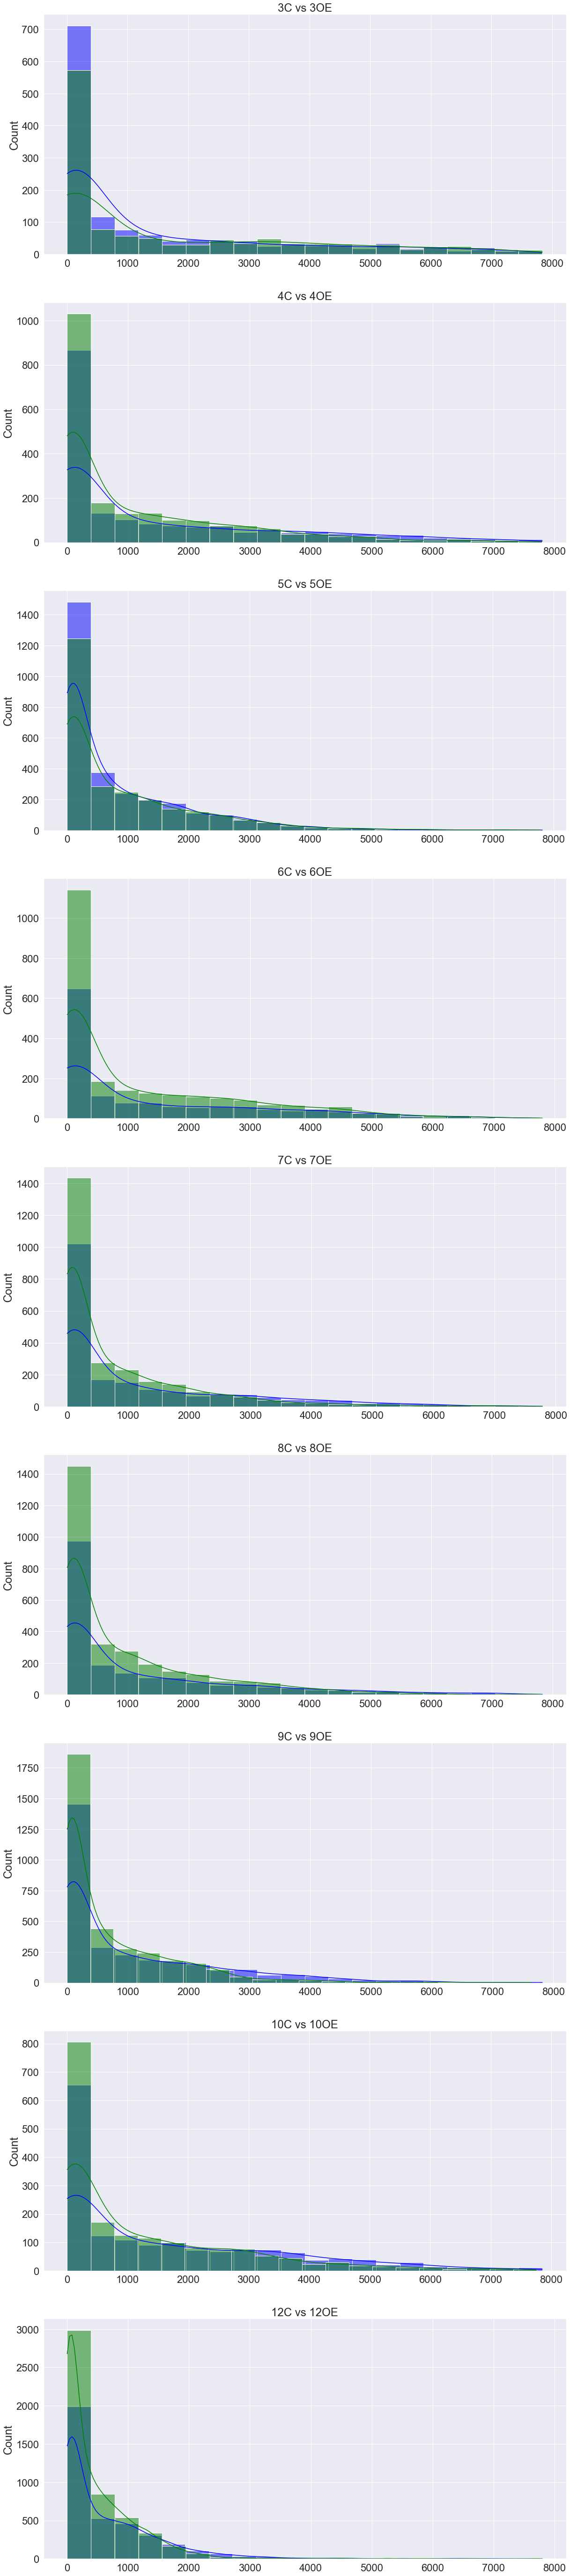

In [21]:
sns.set(font_scale=2)
fig, ax = plt.subplots(9,figsize=(20,100))
for i,j in enumerate([3,4,5,6,7,8,9,10,12]):
    # 3C
    control = f'{j}C'
    # 3OE
    experimental = f'{j}OE'
    ax[i].title.set_text(f'{control} vs {experimental}')
    sns.histplot(data[control], kde=True, bins=20, color='blue',ax=ax[i])
    sns.histplot(data[experimental], kde=True, bins=20, color='green',ax=ax[i])
plt.show()

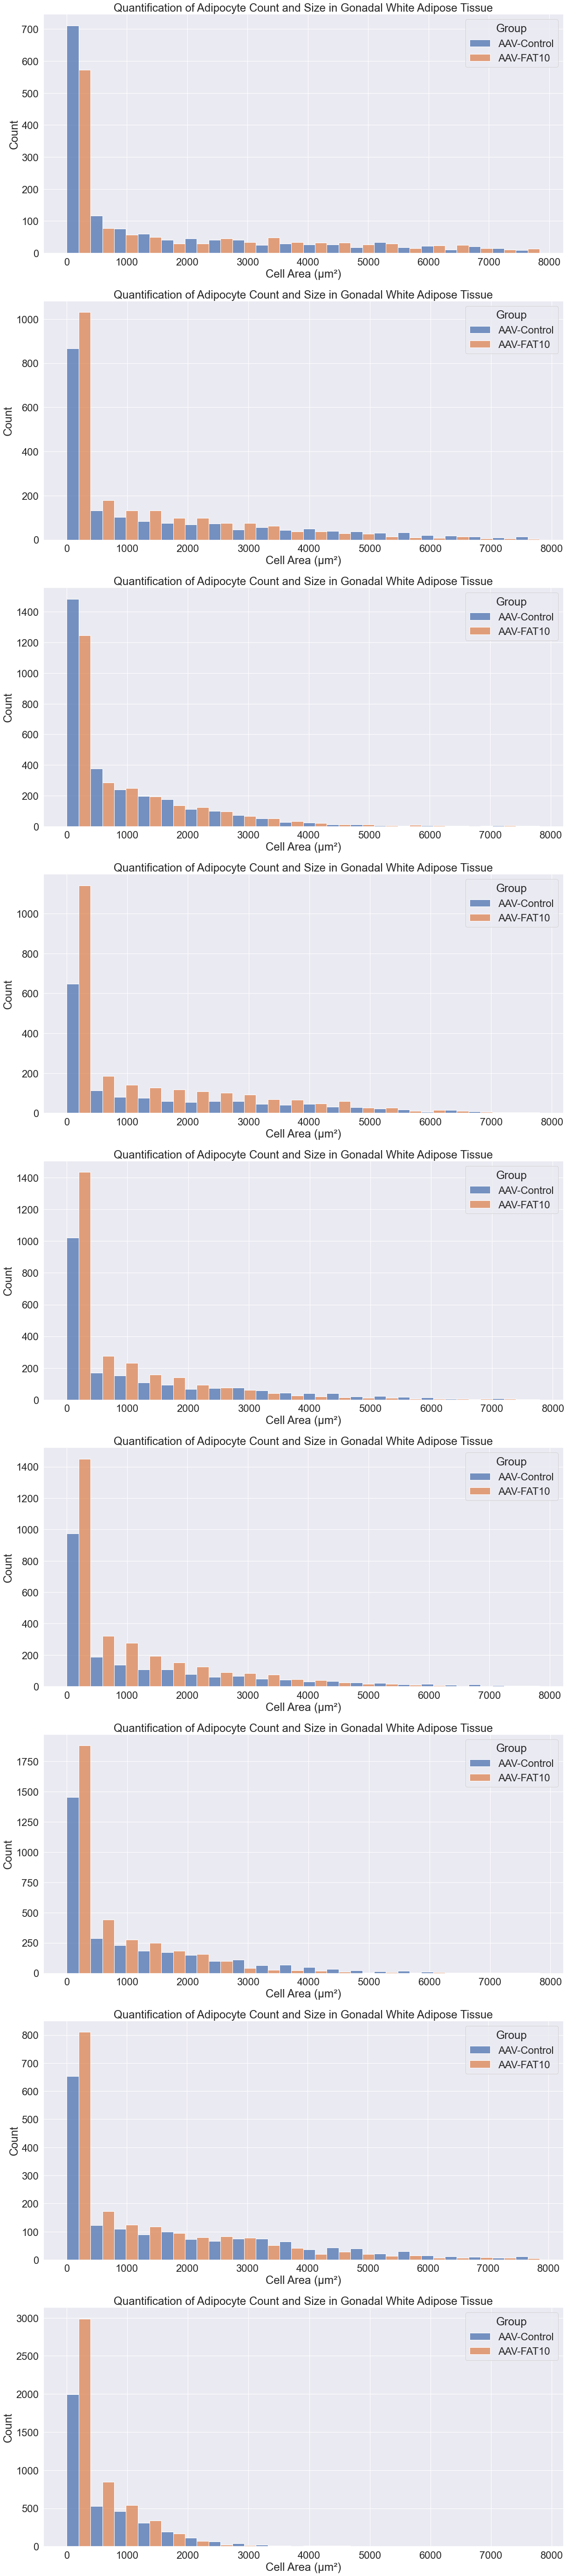

In [30]:
sns.set(font_scale=2)
fig, ax = plt.subplots(9,figsize=(20,100))
for i,j in enumerate([3,4,5,6,7,8,9,10,12]):
    control = f'{j}C'
    experimental = f'{j}OE'
    ax[i].title.set_text(f'Quantification of Adipocyte Count and Size in Gonadal White Adipose Tissue')
    combined = data[control] + data[experimental]
    group_labels = ['AAV-Control'] * len(data[control]) + ['AAV-FAT10'] * len(data[experimental])
    d = {'Cell Area': combined, 'Group': group_labels}
    sns.histplot(data=d, x='Cell Area', hue='Group', bins=20, multiple='dodge', ax=ax[i])
    ax[i].set_xlabel('Cell Area (μm²)')
plt.show()

In [23]:
def get_super(x): 
    normal = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789+-=()"
    super_s = "ᴬᴮᴄᴰᴱᶠᴳᴴᴵᴶᴷᴸᴹᴺᴼᴾQᴿˢᵀᵁᵛᵂˣʸᴵᶻᴬ♭ᶜᴰᴱᶠᴳᴴᴵᴶᴷᴸᴹᴺᴼᴾ₁₂₃₄₅₆₇₈₉₊₋₌₍₎"
    res = x.maketrans(''.join(normal), ''.join(super_s)) 
    return x.translate(res)

ValueError: Could not interpret value `Cell Area /(cubic microns/)` for parameter `x`

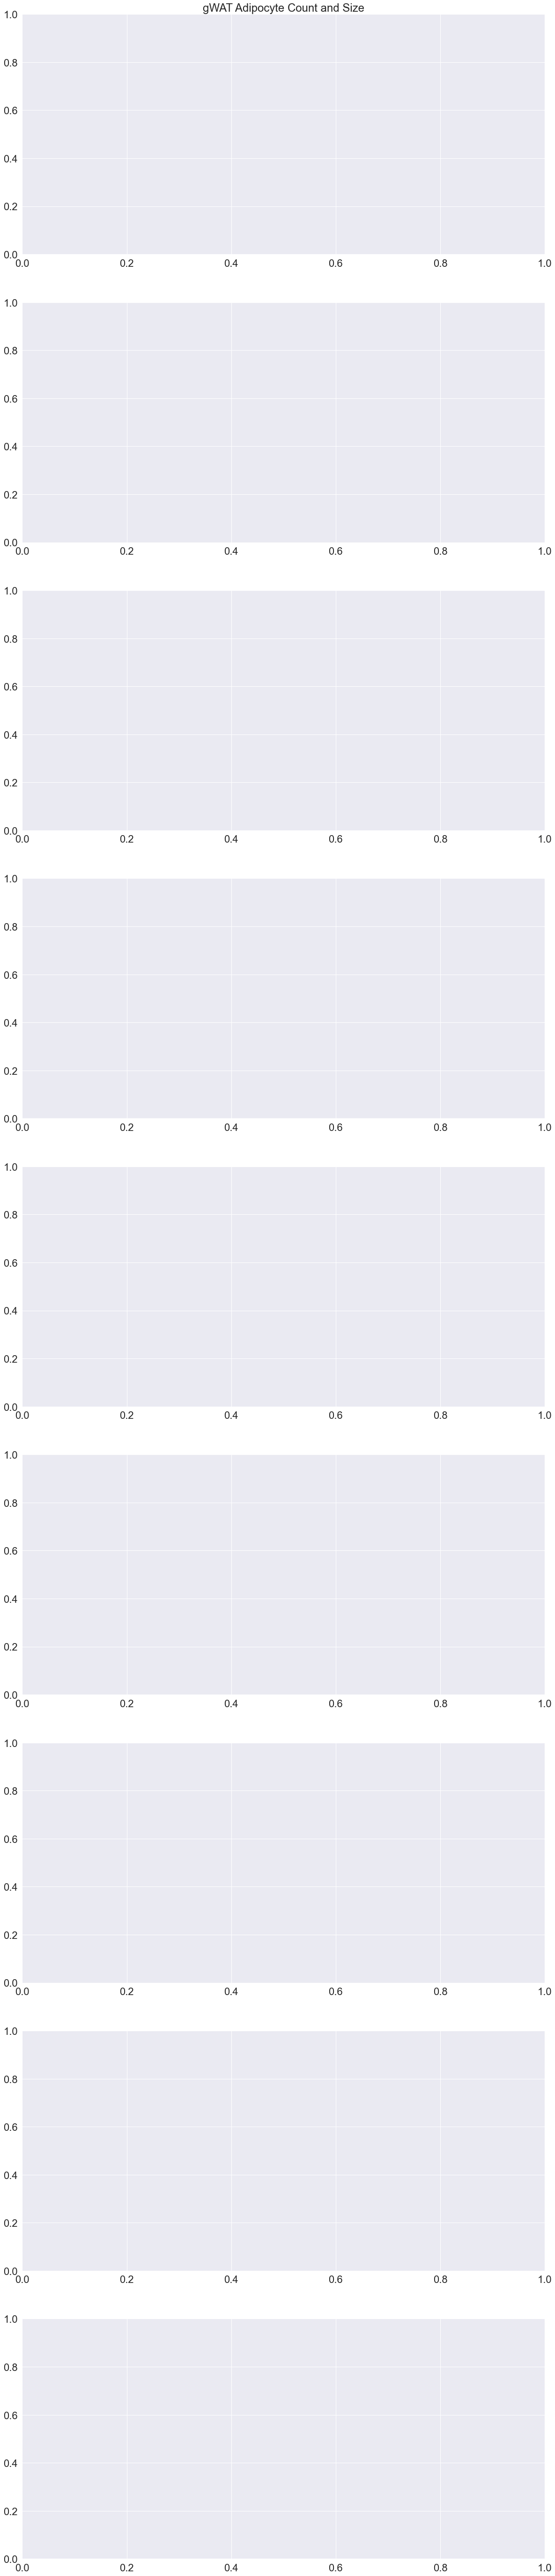

In [26]:
sns.set(font_scale=2)
fig, ax = plt.subplots(9,figsize=(20,100))
for i,j in enumerate([3,4,5,6,7,8,9,10,12]):
    control = f'{j}C'
    experimental = f'{j}OE'
    ax[i].title.set_text('gWAT Adipocyte Count and Size')
    combined = data[control] + data[experimental]
    group_labels = ['AAV-Control'] * len(data[control]) + ['AAV-FAT10'] * len(data[experimental])
    d = {'Cell Area': combined, 'Group': group_labels}
    sns.kdeplot(data=d, x="Cell Area /(cubic microns/)",hue='Group', fill=False, common_norm=False, alpha=1,ax=ax[i],linewidth = 1.5)
plt.show()

In [ ]:
means = [[],[]]
for i,j in enumerate([3,4,5,6,7,8,9,10,12]):
    control = f'{j}C'
    experimental = f'{j}OE'
    print(f'{control} vs {experimental}')
    print(f'Mean: {statistics.mean(data[control])}, {statistics.mean(data[experimental])}')
    means[0].append(statistics.mean(data[control]))
    means[1].append(statistics.mean(data[experimental]))
    print(f'SD: {statistics.stdev(data[control])}, {statistics.stdev(data[experimental])}')
    print(f'SE: {statistics.stdev(data[control])/len(data[control])}, {statistics.stdev(data[experimental])/len(data[control])}\n')

In [ ]:
print(means)

In [10]:
control = f'C'
experimental = f'OE'
print(f'{control} vs {experimental}')
print(ttest_rel(means[0],means[1]))
print()

C vs OE
Ttest_relResult(statistic=2.3774433770303256, pvalue=0.04472378618587663)

